<h1 style="font-family:verdana;"> <center>🏠 House Prices Prediction &amp; Notebooks : The Tutorial 🏠</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Strive for Excellence, Not Perfection</center></p>

***

# House Prices Prediction
Studi kasus sistem persamaan linear dengan menggunakan python

Simple linear regression
adalah metode statistik untuk memprediksi nilai satu variabel (variabel dependen) berdasarkan nilai variabel lain (variabel independen). Dalam kasus ini, kita ingin memprediksi harga rumah (variabel dependen) berdasarkan usia rumah (variabel independen).

Persamaan 1 mendefinisikan hubungan linier antara usia (x) dan harga (y) rumah.


Berikut contoh sistem persamaan linier yang dapat digunakan untuk memprediksi harga rumah:

Persamaan
Y = b0 + b1x + €
, di mana:

- Y adalah variabel dependen, yaitu variabel yang ingin kita prediksi
- x adalah variabel independen, yaitu variabel yang kita gunakan untuk memprediksi Y
- b0 adalah y-intercept, yaitu nilai Y ketika x sama dengan 0
- b1 adalah slope, yang mewakili perubahan Y untuk setiap perubahan unit dalam x
- € adalah kesalahan statistik, yaitu perbedaan antara nilai aktual Y dan nilai prediksi Y

### Membuat data rumah yang berisi umur rumah dan harga rumah

In [15]:
import pandas as pd

# Buat dataframe
df = pd.DataFrame({
    "Age of house": [10, 15, 20, 20, 25],
    "Price of house": [350, 250, 300, 240, 225]
})

# Cetak dataframe
df

,Age of house,Price of house
0,10,350
1,15,250
2,20,300
3,20,240
4,25,225


### Memvisualisasikan data yang telah dibuat dengan menggunakan librari matplotlib, untuk grafiknya kita memakai scatter plot

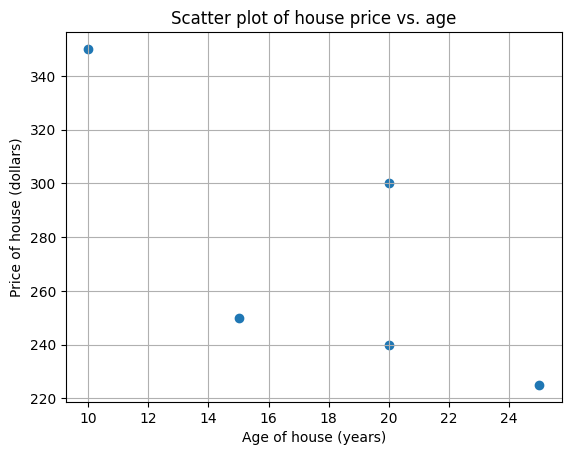

In [16]:
import matplotlib.pyplot as plt
# Pembuatan Scatter plot (diagram tebar) dari 2 kolom
plt.scatter(df["Age of house"], df["Price of house"])

# Label sumbu x dan y
plt.xlabel("Age of house (years)")
plt.ylabel("Price of house (dollars)")

# Beri judul pada plot
plt.title("Scatter plot of house price vs. age")
# Beri garis pada plot
plt.grid()
# Tampilkan plot
plt.show()

## Menghitung Regresi parameter

## Disini dengan menggunakan library skicit-learn kita memfitkan data lalu mencari gradien dan titik potong

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Buat model regresi linier
model = LinearRegression()

# Latih model pada data di kolom tertentu
model.fit(df[['Age of house']], df['Price of house'])

# Dapatkan parameter regresi
intercept = model.intercept_
slope = model.coef_[0]

# Cetak parameter regresi
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 396.92307692307696
Slope: -6.884615384615388


Hasil prediksi didapat Intercept dan Slope

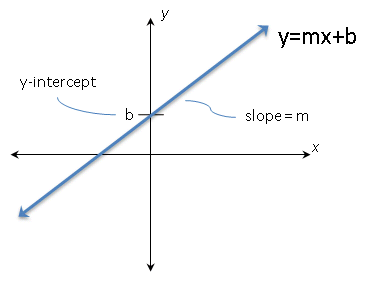

Dari rumus di atas kita masukkan ke dalam tabel, dengan menambahkan kolom baru dengan rumus sebagai berikut

## Memasukkan hasil prediksi tadi ke dalam kolom baru

In [18]:
df['Prediction'] = 396.92 - 6.88 * df['Age of house']
df['Prediction'] = np.around(df['Prediction']).astype(int) #Pembulatan hasil prediksi
df

,Age of house,Price of house,Prediction
0,10,350,328
1,15,250,294
2,20,300,259
3,20,240,259
4,25,225,225


## Memvisualisasikan kembali data yang telah kita regresi linear

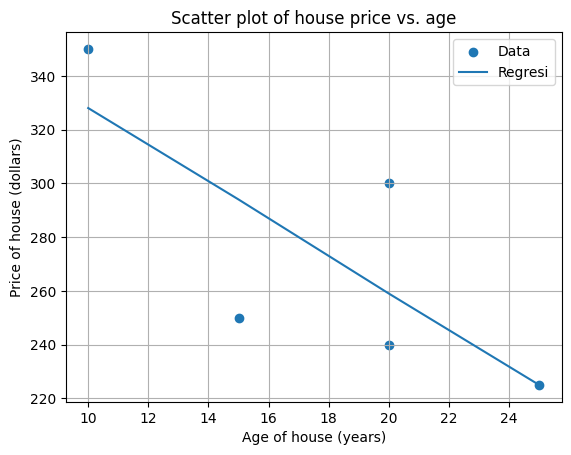

In [19]:
# Buat scatter plot
plt.scatter(df["Age of house"], df["Price of house"], label="Data")
plt.plot(df["Age of house"], df["Prediction"], label="Regresi")

# Label sumbu x dan y
plt.xlabel("Age of house (years)")
plt.ylabel("Price of house (dollars)")

# Beri judul pada plot
plt.title("Scatter plot of house price vs. age")

# Tampilkan plot
plt.legend()
plt.grid()
plt.show()

Dari rumus di atas kita masukkan ke dalam tabel, dengan menambahkan kolom baru yaitu Residual dengan rumus sebagai berikut

## Menghitung Residual menggunakan matrix algebra

In [20]:
df['Residual'] = df['Price of house'] - df['Prediction']
df['Residual'] = np.around(df['Residual']).astype(int) #Pembulatan hasil prediksi
df['Residual^2'] = ((df['Price of house'] - df['Prediction'])**2)

df

,Age of house,Price of house,Prediction,Residual,Residual^2
0,10,350,328,22,484
1,15,250,294,-44,1936
2,20,300,259,41,1681
3,20,240,259,-19,361
4,25,225,225,0,0


Menghitung The sum of squared errors (SSE)

In [26]:
SSE = df['Residual^2'].sum()
SSE = np.around(df['Residual^2'].sum().astype(int)) #Pembulatan hasil prediksi
SSE

4462


Menghitung Mean of squared errors (SSE)

In [25]:
SSE = 1/5 * df['Residual^2'].mean()
SSE = np.around(df['Residual^2'].mean().astype(int)) #Pembulatan hasil prediksi
MSE

892

## Menghitung The sum of squared errors (SSE) dengan menggunakan matrix array

In [33]:
Residual = np.array(df['Residual'])
ResidualT = np.transpose(df['Residual'])
ResidualT * Residual

0     484
1    1936
2    1681
3     361
4       0
Name: Residual, dtype: int64

Didapat hasil yang sama persis dengan kita menggunakan matrix algebra

In [37]:
SSE = np.sum(ResidualT * Residual)
SSE

4462

Didapat juga hasil yang sama persis dengan kita menggunakan matrix algebra

## Metrik korelasi

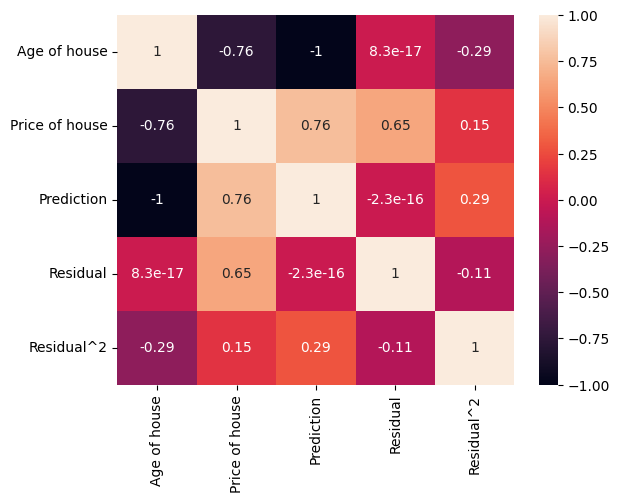

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Buat dataframe
df = pd.DataFrame({
    "Age of house": [10, 15, 20, 20, 25],
    "Price of house": [350, 250, 300, 240, 225],
    "Prediction": [328.12, 293.72, 259.32, 259.32, 224.92],
    "Residual": [22, -44, 41, -19, 0],
    "Residual^2": [478.7344, 1911.4384, 1654.8624, 373.2624, 0.0064]
})

# Buat plot metrik korelasi
sns.heatmap(df.corr(), annot=True)
plt.show()

## Kesimpulan


Kesimpulan akhir mengenai House Price Detection adalah bahwa House Price Detection adalah sebuah metode untuk memprediksi harga rumah menggunakan data yang berkaitan dengan rumah tersebut, seperti luas rumah, lokasi rumah, dan lain-lain.

Metode House Price Detection yang paling umum digunakan adalah metode regresi linier. Metode regresi linier adalah sebuah metode untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen. Selain metode regresi linier, masih banyak metode House Price Detection lainnya yang dapat digunakan, seperti metode machine learning, metode deep learning, dan lain-lain.

House price prediction dapat bermanfaat bagi berbagai pihak, termasuk penjual rumah, pembeli rumah, dan investor. Penjual rumah dapat menggunakan house price prediction untuk menentukan harga jual rumah mereka secara lebih akurat. Pembeli rumah dapat menggunakan house price prediction untuk mengetahui kisaran harga rumah yang mereka inginkan. Investor dapat menggunakan house price prediction untuk menentukan kapan waktu yang tepat untuk membeli atau menjual rumah.


